In [1]:
# imports
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd #https://www.dataquest.io/blog/large_files/pandas-cheat-sheet.pdf
import seaborn as sns
import itertools

In [2]:
# read input
import csv

filename_train = "data/training_set_VU_DM_2014.csv"
# filename_test = "data/training_set_VU_DM_2014.csv"

df_train = pd.read_csv(filename_train)
# df_exp = df_train.
# df_test = pd.read_csv(filename_test)

In [3]:
df_train.head(20)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [26]:
df_sample = df_train#.sample(frac=0.1)

In [27]:
print("This dataset contains %d rows and %d columns" % df_train.shape)
print("The sample dataset contains %d rows and %d columns" % df_sample.shape)

This dataset contains 4958347 rows and 54 columns
The sample dataset contains 4958347 rows and 54 columns


In [28]:
print("The first 5 records in the dataset:")
df_sample.head()

The first 5 records in the dataset:


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


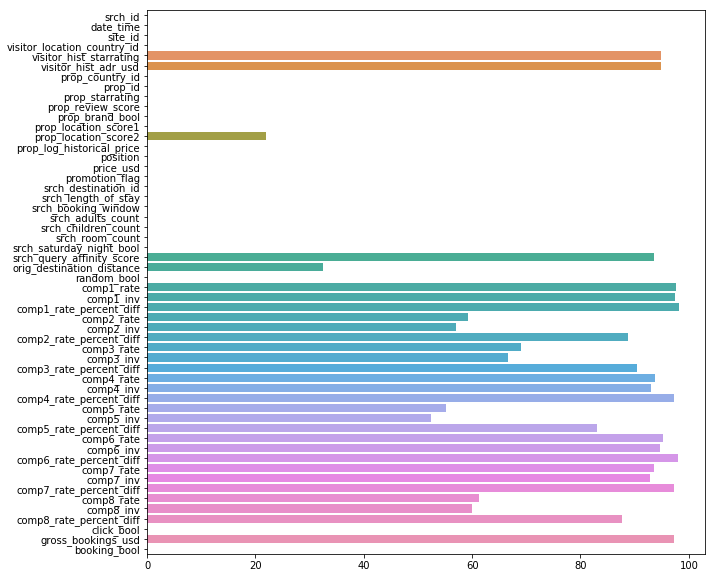

In [29]:
# Missing values in percentages
missing = df_train.isnull().sum() / len(df_train) * 100
plt.figure(figsize=(10, 10))
sns.barplot(x=missing.values, y=missing.keys())
plt.show()

In [30]:
# Datatypes per column
df_sample.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

In [31]:
print("Statistical summary of columns in dataset:")
df_sample.describe()

Statistical summary of columns in dataset:


,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [32]:
print("Correlation matrix of the dataset:")
df_train.corr()

Correlation matrix of the dataset:


,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
srch_id,1.000000,0.003331,-0.006097,-0.010462,0.000316,-0.005468,-0.000166,-0.001577,-0.002959,-0.003828,...,0.007789,-0.002917,0.002822,0.003499,0.000073,-0.001070,0.000841,0.000194,0.000951,0.000487
site_id,0.003331,1.000000,-0.305921,0.309078,0.099104,-0.312593,0.002943,0.174845,-0.071645,-0.196217,...,-0.006023,-0.001217,-0.011761,-0.004750,0.012756,-0.005167,0.000152,0.008497,0.053015,-0.001354
visitor_location_country_id,-0.006097,-0.305921,1.000000,-0.256252,-0.073231,0.482787,0.000432,-0.112911,0.064279,0.182405,...,-0.012159,0.004379,-0.006172,-0.017498,-0.016626,0.010390,-0.001532,-0.004806,-0.048212,0.002524
visitor_hist_starrating,-0.010462,0.309078,-0.256252,1.000000,0.498618,-0.285770,0.007933,0.295903,-0.000815,-0.183249,...,0.002736,-0.001198,-0.005446,-0.001889,0.034486,0.000307,0.004346,0.002541,0.104260,-0.002044
visitor_hist_adr_usd,0.000316,0.099104,-0.073231,0.498618,1.000000,-0.073566,0.000575,0.153966,0.046391,-0.057195,...,-0.010555,0.004687,0.011371,-0.010601,0.006237,-0.002069,0.002971,0.003858,0.108476,0.000602
prop_country_id,-0.005468,-0.312593,0.482787,-0.285770,-0.073566,1.000000,0.000162,-0.161729,0.092686,0.310493,...,-0.041114,-0.007162,-0.061137,-0.024660,-0.031299,0.011225,-0.002427,-0.006222,-0.064152,0.001227
prop_id,-0.000166,0.002943,0.000432,0.007933,0.000575,0.000162,1.000000,0.002553,-0.000103,0.000922,...,0.012274,-0.005572,-0.002152,0.007769,0.003004,0.003048,-0.001985,0.000246,0.002713,-0.000508
prop_starrating,-0.001577,0.174845,-0.112911,0.295903,0.153966,-0.161729,0.002553,1.000000,0.306454,0.021329,...,-0.025211,-0.016826,-0.028579,-0.011136,0.037041,-0.030334,0.015429,0.030788,0.175424,0.021206
prop_review_score,-0.002959,-0.071645,0.064279,-0.000815,0.046391,0.092686,-0.000103,0.306454,1.000000,0.203949,...,-0.022200,-0.008081,0.003435,-0.009931,0.068148,-0.006711,0.006997,0.023424,0.076358,0.025800
prop_brand_bool,-0.003828,-0.196217,0.182405,-0.183249,-0.057195,0.310493,0.000922,0.021329,0.203949,1.000000,...,-0.087572,-0.002585,-0.062500,-0.036992,-0.011238,-0.057156,-0.001317,0.000866,-0.033181,0.009991


In [33]:
df_sample.columns.tolist()

['srch_id',
 'date_time',
 'site_id',
 'visitor_location_country_id',
 'visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'position',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'random_bool',
 'comp1_rate',
 'comp1_inv',
 'comp1_rate_percent_diff',
 'comp2_rate',
 'comp2_inv',
 'comp2_rate_percent_diff',
 'comp3_rate',
 'comp3_inv',
 'comp3_rate_percent_diff',
 'comp4_rate',
 'comp4_inv',
 'comp4_rate_percent_diff',
 'comp5_rate',
 'comp5_inv',
 'comp5_rate_percent_diff',
 'comp6_rate',
 'comp6_inv',
 'comp6_rate_percent_diff',
 'comp7_rate',
 'comp7_inv',
 'comp7_rate_percent_diff',
 'comp8_rate',


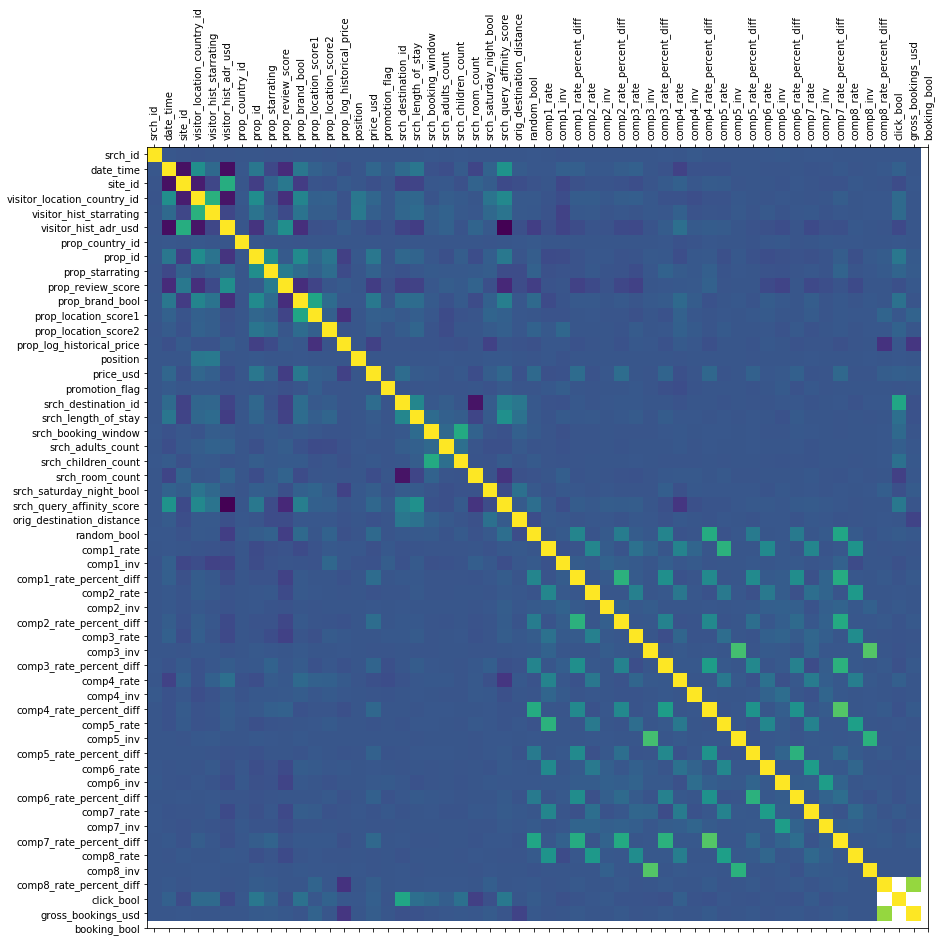

In [34]:
plt.figure(figsize=(14, 14))
plt.matshow(df_sample.corr(), fignum=1)
plt.xticks(range(0,len(df_sample.columns.tolist())), df_sample.columns.tolist(), rotation="vertical")
plt.yticks(range(0,len(df_sample.columns.tolist())), df_sample.columns.tolist())
plt.show()

In [35]:
# For clarity, the correlation with booking_bool
df_sample.corr()["booking_bool"]

srch_id                        0.000487
site_id                       -0.001354
visitor_location_country_id    0.002524
visitor_hist_starrating       -0.002044
visitor_hist_adr_usd           0.000602
prop_country_id                0.001227
prop_id                       -0.000508
prop_starrating                0.021206
prop_review_score              0.025800
prop_brand_bool                0.009991
prop_location_score1          -0.003273
prop_location_score2           0.066405
prop_log_historical_price     -0.000807
position                      -0.147918
price_usd                      0.000067
promotion_flag                 0.036047
srch_destination_id            0.000800
srch_length_of_stay           -0.024412
srch_booking_window           -0.019582
srch_adults_count             -0.005376
srch_children_count            0.003872
srch_room_count                0.007948
srch_saturday_night_bool       0.005478
srch_query_affinity_score      0.025524
orig_destination_distance     -0.003687


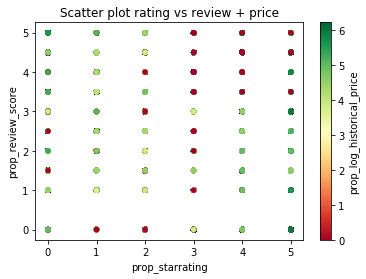

In [19]:
# Not as useful a plot as I thought it would be 😅
df_train.plot.scatter(x='prop_starrating', y='prop_review_score', c='prop_log_historical_price', colormap="RdYlGn", sharex=False, title="Scatter plot rating vs review + price")

In [36]:
print("People per country (id):")
df_train.groupby('prop_country_id')['srch_id'].count()

People per country (id):


prop_country_id
1           76
2         4495
4        19142
7           10
9         6843
10         724
11         366
13        4088
14       18827
15       23548
16        1561
17        3402
18       12976
19          24
20          75
21         140
22         879
23        6288
25          35
26        6511
27        2418
30        2450
31      154287
32       19667
33        2136
34         915
35       13395
37        1155
38         130
39       28054
        ...   
194       1508
195        339
196        364
197         38
200       1008
201        248
202      18850
203        159
204          5
205      29473
206       4351
207        213
208         13
211       3458
212       6453
213       3665
214        339
215      79981
216      61096
217         21
219    3030125
220      71115
221       6973
222         86
223       5809
224       4067
225      14351
226         21
229       1978
230       2620
Name: srch_id, Length: 172, dtype: int64

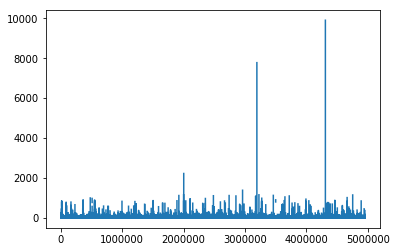

In [3]:
# Just checking, not useful
df_train.comp7_rate_percent_diff.plot()

In [ ]:
# inspecting 

In [37]:
df_train.groupby('srch_destination_id').count()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
srch_destination_id,,,,,,,,,,,,,,,,,,,,,
2,48,48,48,48,0,0,48,48,48,48,...,13,24,28,15,0,0,0,48,2,48
3,8,8,8,8,0,0,8,8,8,8,...,0,0,0,0,0,0,0,8,0,8
5,8,8,8,8,0,0,8,8,8,8,...,0,4,5,2,0,0,0,8,0,8
7,13,13,13,13,0,0,13,13,13,13,...,0,0,0,0,0,0,0,13,1,13
8,17,17,17,17,17,17,17,17,17,17,...,1,16,16,6,0,0,0,17,1,17
9,32,32,32,32,0,0,32,32,32,32,...,0,0,0,0,0,0,0,32,1,32
10,31,31,31,31,0,0,31,31,31,31,...,0,0,0,0,0,0,0,31,1,31
12,599,599,599,599,95,95,599,599,599,599,...,0,0,0,0,309,322,83,599,16,599
14,30,30,30,30,0,0,30,30,30,30,...,0,0,0,0,25,26,8,30,2,30


In [38]:
# Show all columns
n_output_cols = 4
for i in range(len(df_train.columns.values)):
    col_width = max(len(col) for col in df_train.columns.values[::n_output_cols]) + 2
    print(df_train.columns.values[i].ljust(col_width), end="")
    if i % n_output_cols == n_output_cols - 1:
        print()

srch_id                    date_time                  site_id                    visitor_location_country_id
visitor_hist_starrating    visitor_hist_adr_usd       prop_country_id            prop_id                    
prop_starrating            prop_review_score          prop_brand_bool            prop_location_score1       
prop_location_score2       prop_log_historical_price  position                   price_usd                  
promotion_flag             srch_destination_id        srch_length_of_stay        srch_booking_window        
srch_adults_count          srch_children_count        srch_room_count            srch_saturday_night_bool   
srch_query_affinity_score  orig_destination_distance  random_bool                comp1_rate                 
comp1_inv                  comp1_rate_percent_diff    comp2_rate                 comp2_inv                  
comp2_rate_percent_diff    comp3_rate                 comp3_inv                  comp3_rate_percent_diff    
comp4_rate         